In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pymodulon.core import IcaData
from pymodulon import example_data
from pymodulon.io import save_to_json, load_json_model
from pymodulon.enrichment import *
import plotly.express as px
from pymodulon.plotting import *

In [16]:
ica_data = load_json_model('../data/yarrowia2025_fixed.json')

ica_data

In [17]:
ica_data.imodulon_table = ica_data.imodulon_table.fillna('Uncharacerized')

ica_data.imodulon_table['Category'] = (ica_data.imodulon_table['Category'].replace('N.A', 'Uncharacterized') .fillna('Uncharacterized')           # NaN → Uncharacterized
)

ica_data.imodulon_table


,iModulon Name,Descriptors,COGs,Category,ngenes,explained_variance
0,FDH,Formate Dehydrogenase,C (Energy Production and Conversion),Energy,58,0.011639
1,FKH2,chromatin regulation,A (RNA processing and modification),Cell division,235,0.044410
2,Zrt_Ftr,"ZRT/FTR (Zinc, iron transporters)",S (Unknown),Transport,182,0.035740
3,UC20,N.A,N.A,Uncharacterized,0,0.013702
4,HSP3,Heat shock protein subunits,N.A,Stress,38,0.007174
5,UC5,N.A,"O (Post translation mods, chaperons)",Uncharacterized,92,0.003345
6,UC4,N.A,S (Unknown),Uncharacterized,253,0.014527
7,UC6,N.A,C (Energy Production and Conversion),Uncharacterized,182,0.001548
8,HOT1,Osmolarity related glycerol biosynthesis,S(Unknown),Stress,83,0.017138
9,UC21,N.A,N.A,Uncharacterized,184,0.001813


In [18]:
### Treemap of explained variance by imodulon category

df = ica_data.imodulon_table.copy(deep=False)
df = df.sort_values(['Category', 'explained_variance'], ascending=[True, False])

# -------------------------------------------------
# 3)  Build the treemap
# -------------------------------------------------
fig = px.treemap(
    df,
    path=['Category', 'iModulon Name'],
    values='explained_variance',
    color='Category',
    color_discrete_sequence=px.colors.qualitative.Set3,
    # ↓ give the figure a tall, narrow “page”
    height=500,      # make it tall
    width=500         # keep it relatively narrow
)
fig.update_traces(
    tiling=dict(
        squarifyratio=1   
    ),
    textfont=dict(
        size=16,      
        color='black',
        family='Arial'    
    ),
    selector=dict(type='treemap')
)

fig.update_layout(
    margin=dict(t=60, l=10, r=10, b=10)
)

fig.show()

Text(0, 0.5, 'Cumulative Explained Variance')

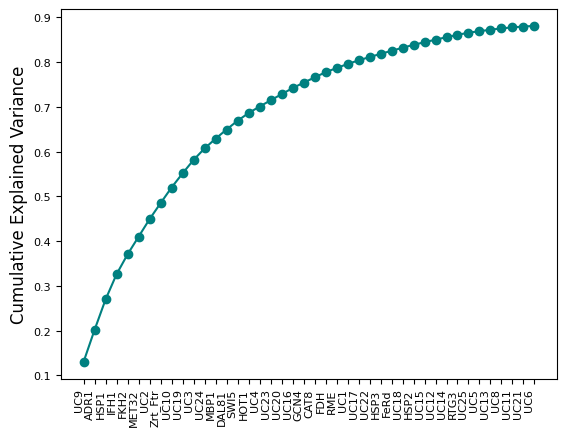

In [19]:
exp_var = ica_data.imodulon_table.sort_values(by='explained_variance', ascending=False).copy(deep=False)

plt.plot(exp_var['iModulon Name'],exp_var['explained_variance'].cumsum(), marker='o',color='teal')
plt.xticks(rotation=90, ha='right',fontsize=8);
plt.yticks(fontsize=8)
plt.ylabel('Cumulative Explained Variance',fontsize=12)


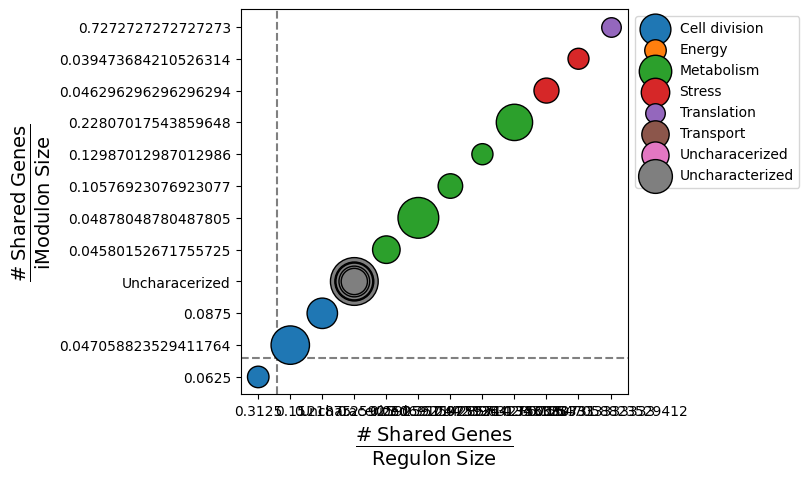

In [41]:
#ica_data.imodulon_table.rename(columns={'ngenes':'n_genes'},inplace=True)

ica_data.imodulon_table['regulator'] = ica_data.imodulon_table['iModulon Name']

compare_imodulons_vs_regulons(ica_data,
                              size_column='ngenes',
                              cat_column='Category',
                              scale=3);


In [14]:
repeated = ica_data.imodulon_table['iModulon Name'][ica_data.imodulon_table['iModulon Name'].duplicated()].unique()
print(repeated)

['UC20' 'UC19' 'UC18']
